In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1) Salary_hike -> Build a prediction model for Salary_hike


Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or python.

In [3]:
df = pd.read_csv('Salary_Data (1).csv')

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
data = df[['YearsExperience','Salary']]
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

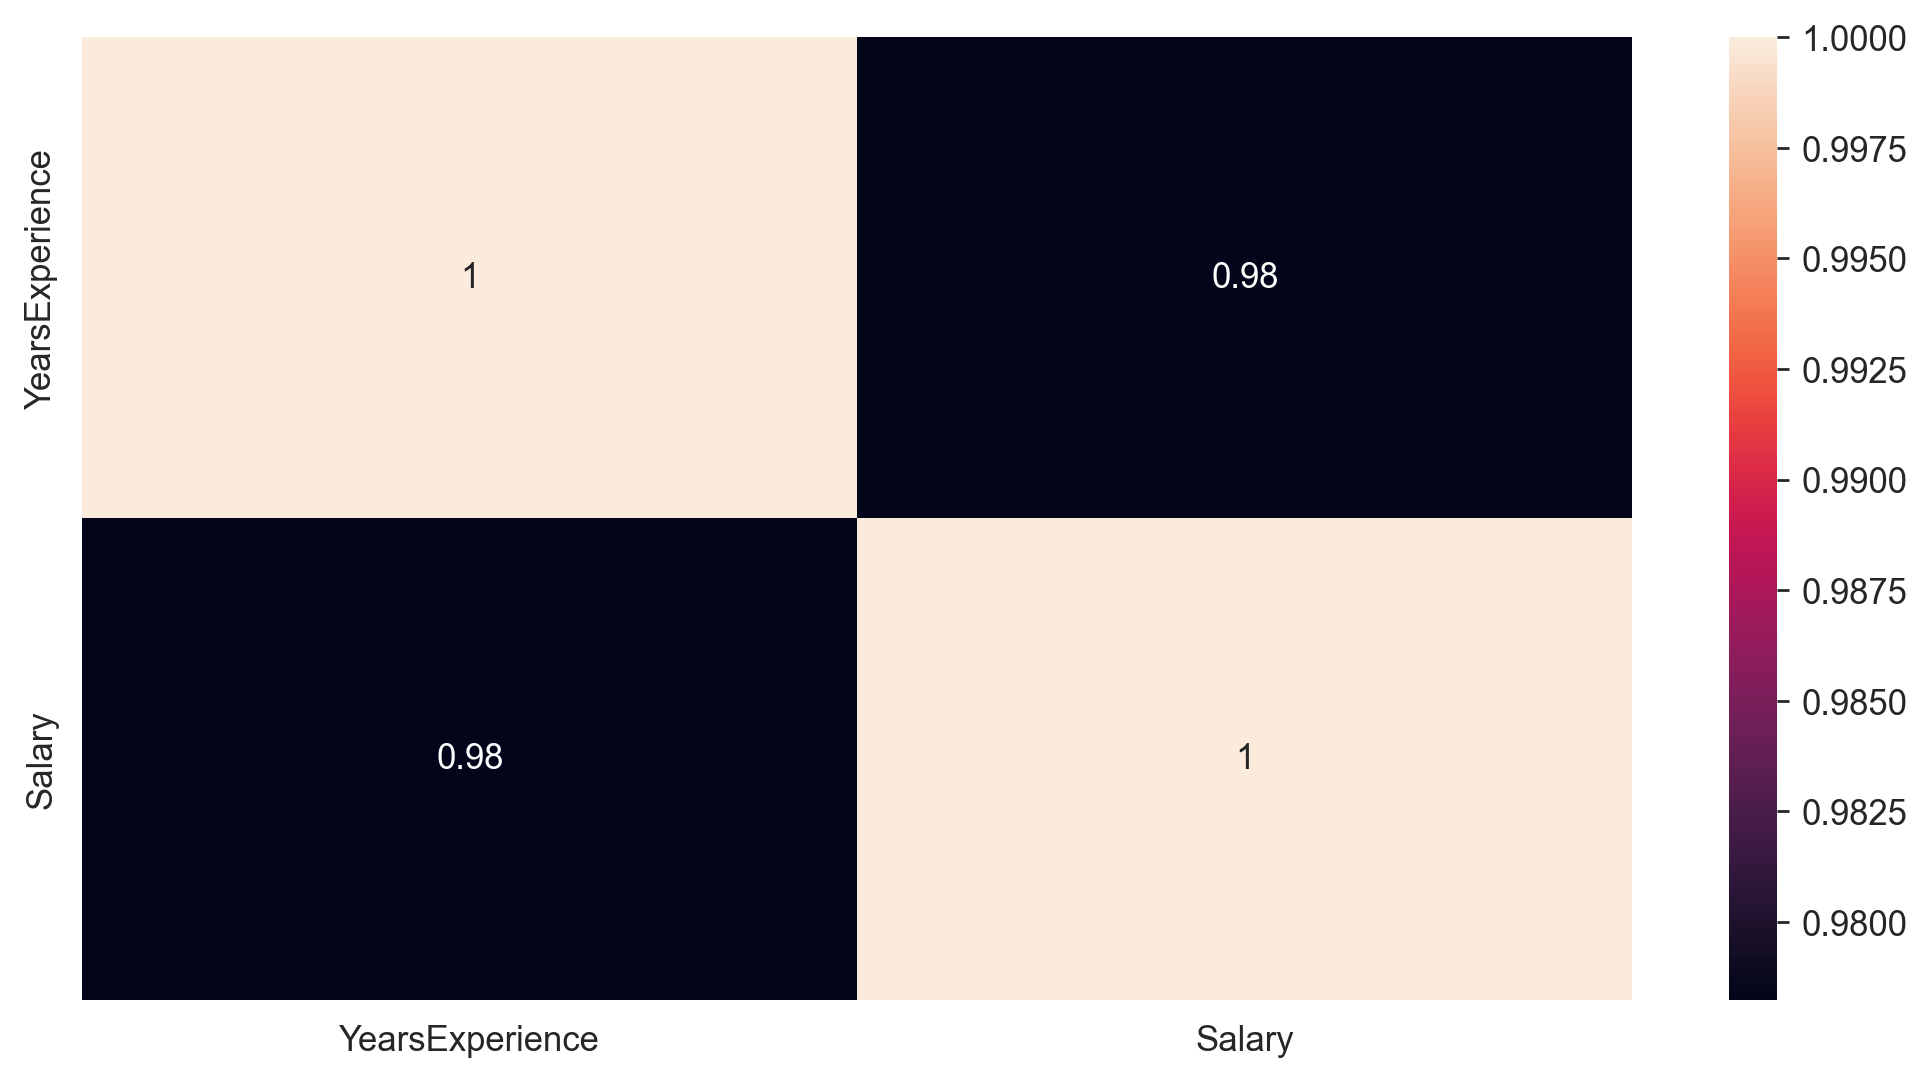

In [9]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Salary', ylabel='Density'>

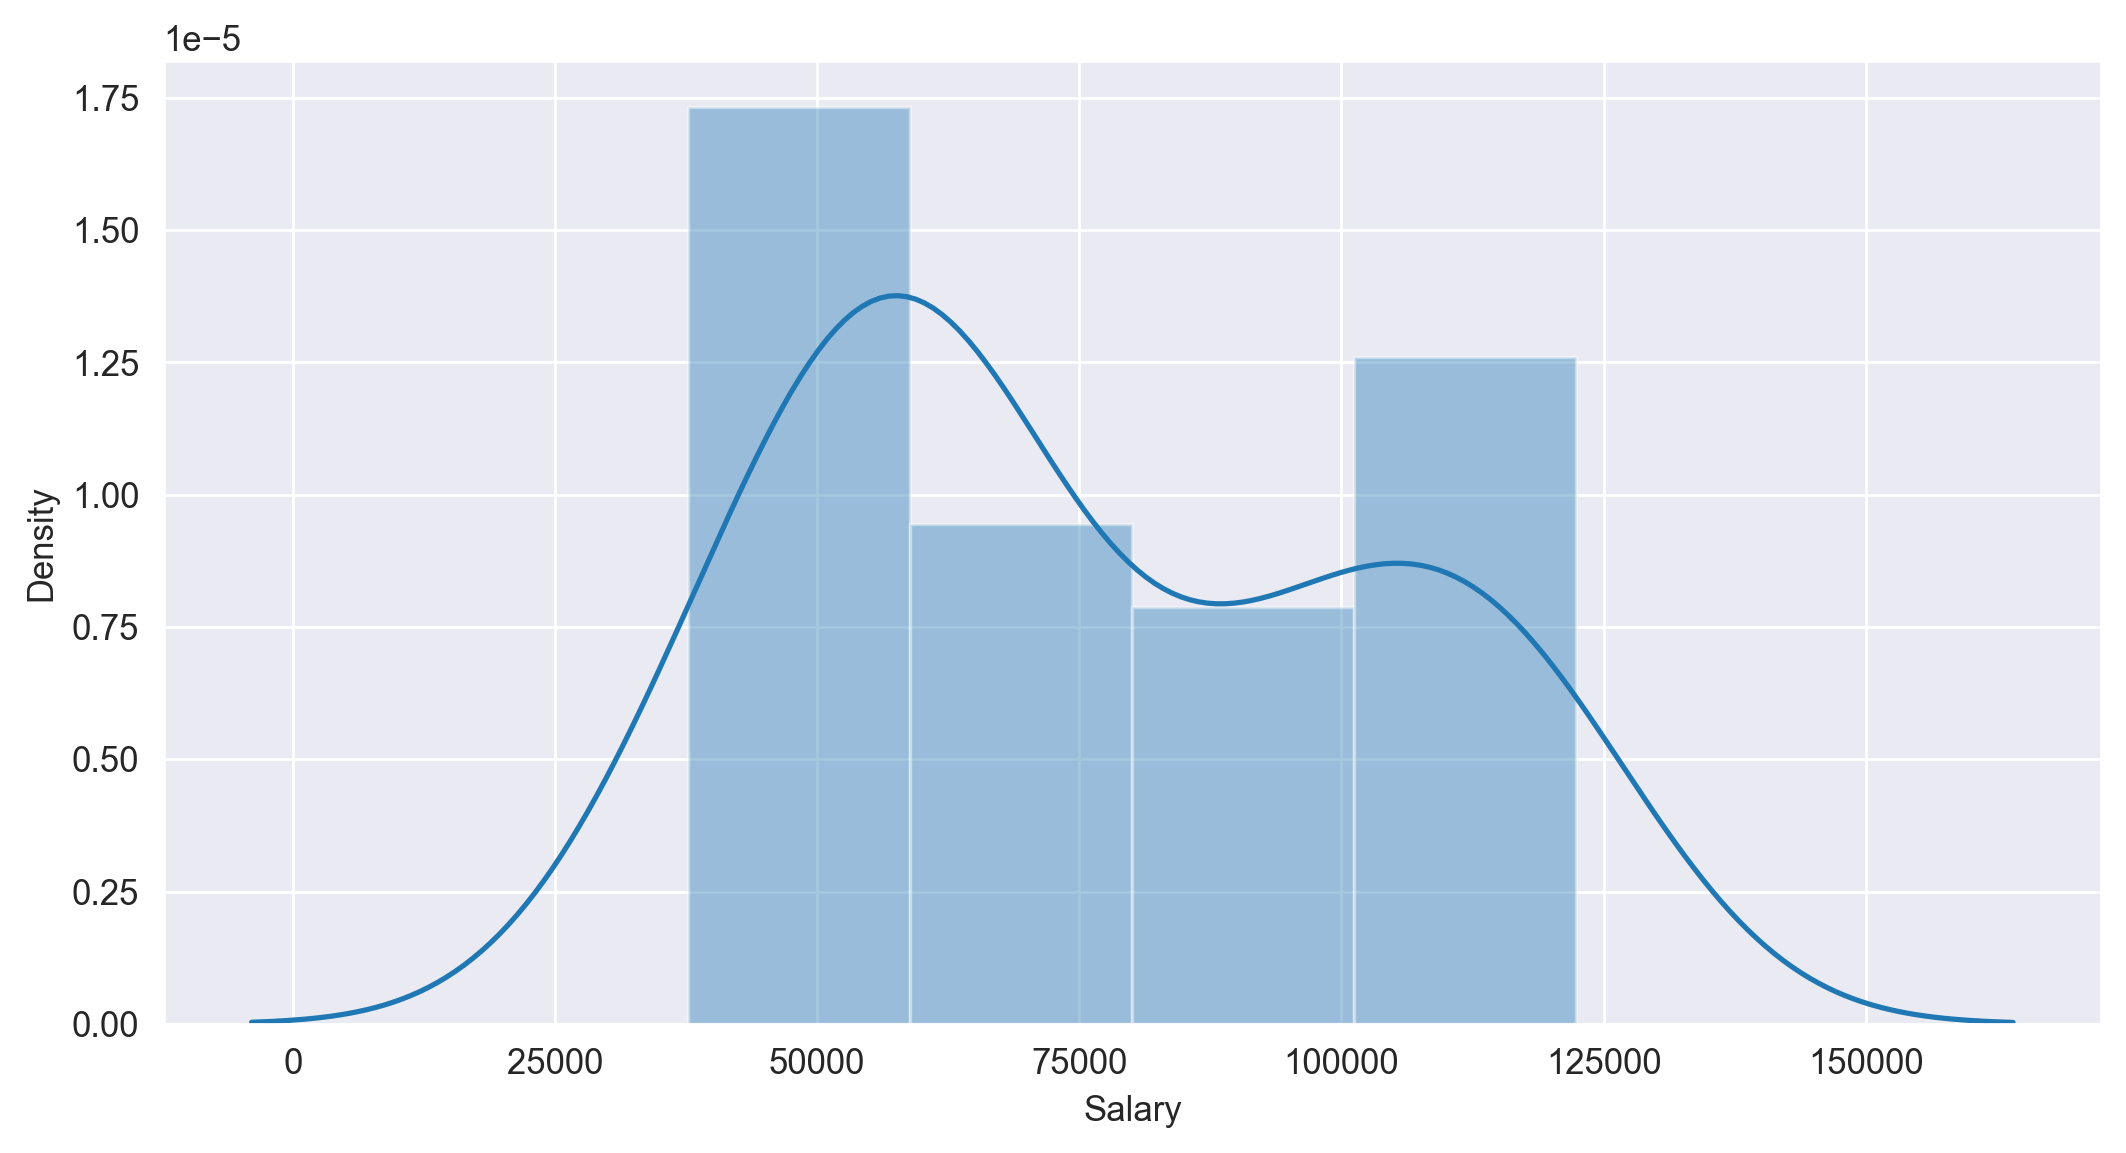

In [10]:
sns.distplot(df['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

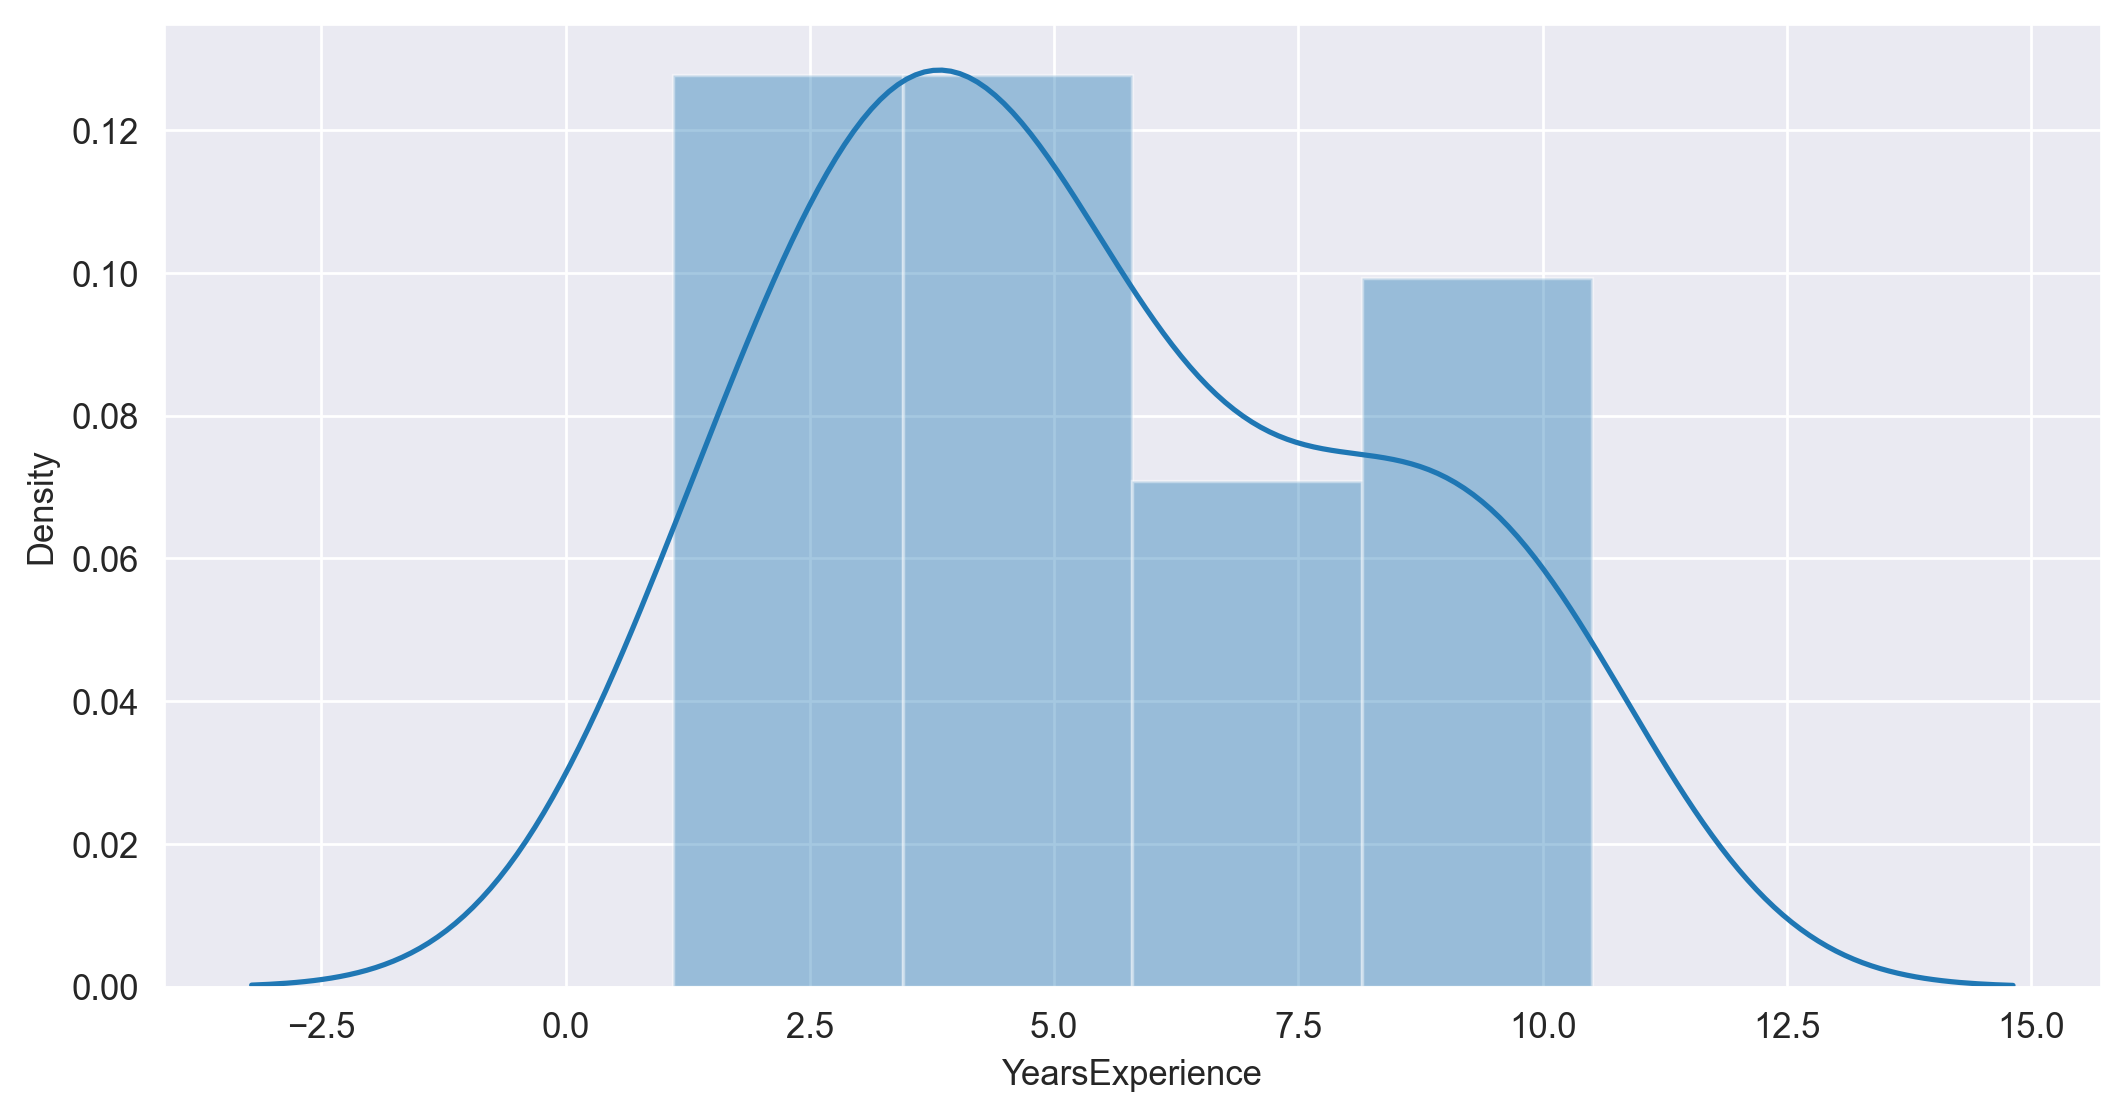

In [11]:
sns.distplot(df['YearsExperience'])

In [12]:
model = smf.ols('YearsExperience~Salary',data=data).fit()

In [13]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [14]:
Salary = 50000

y = 0.000101 * Salary + (-2.383161)

y

2.666839

In [15]:
model.pvalues

Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64

In [16]:
model.rsquared

0.9569566641435086

# Model Prediction

In [17]:
newdf = pd.DataFrame({
    'Salary': [30000,40000,55000,90000,125000,35000]
    
    
})
newdf

,Salary
0,30000
1,40000
2,55000
3,90000
4,125000
5,35000


In [18]:
model.predict(newdf)

0     0.654809
1     1.667466
2     3.186451
3     6.730749
4    10.275047
5     1.161138
dtype: float64

# Data Transformation

# 1) Sqrt

# 2) Log

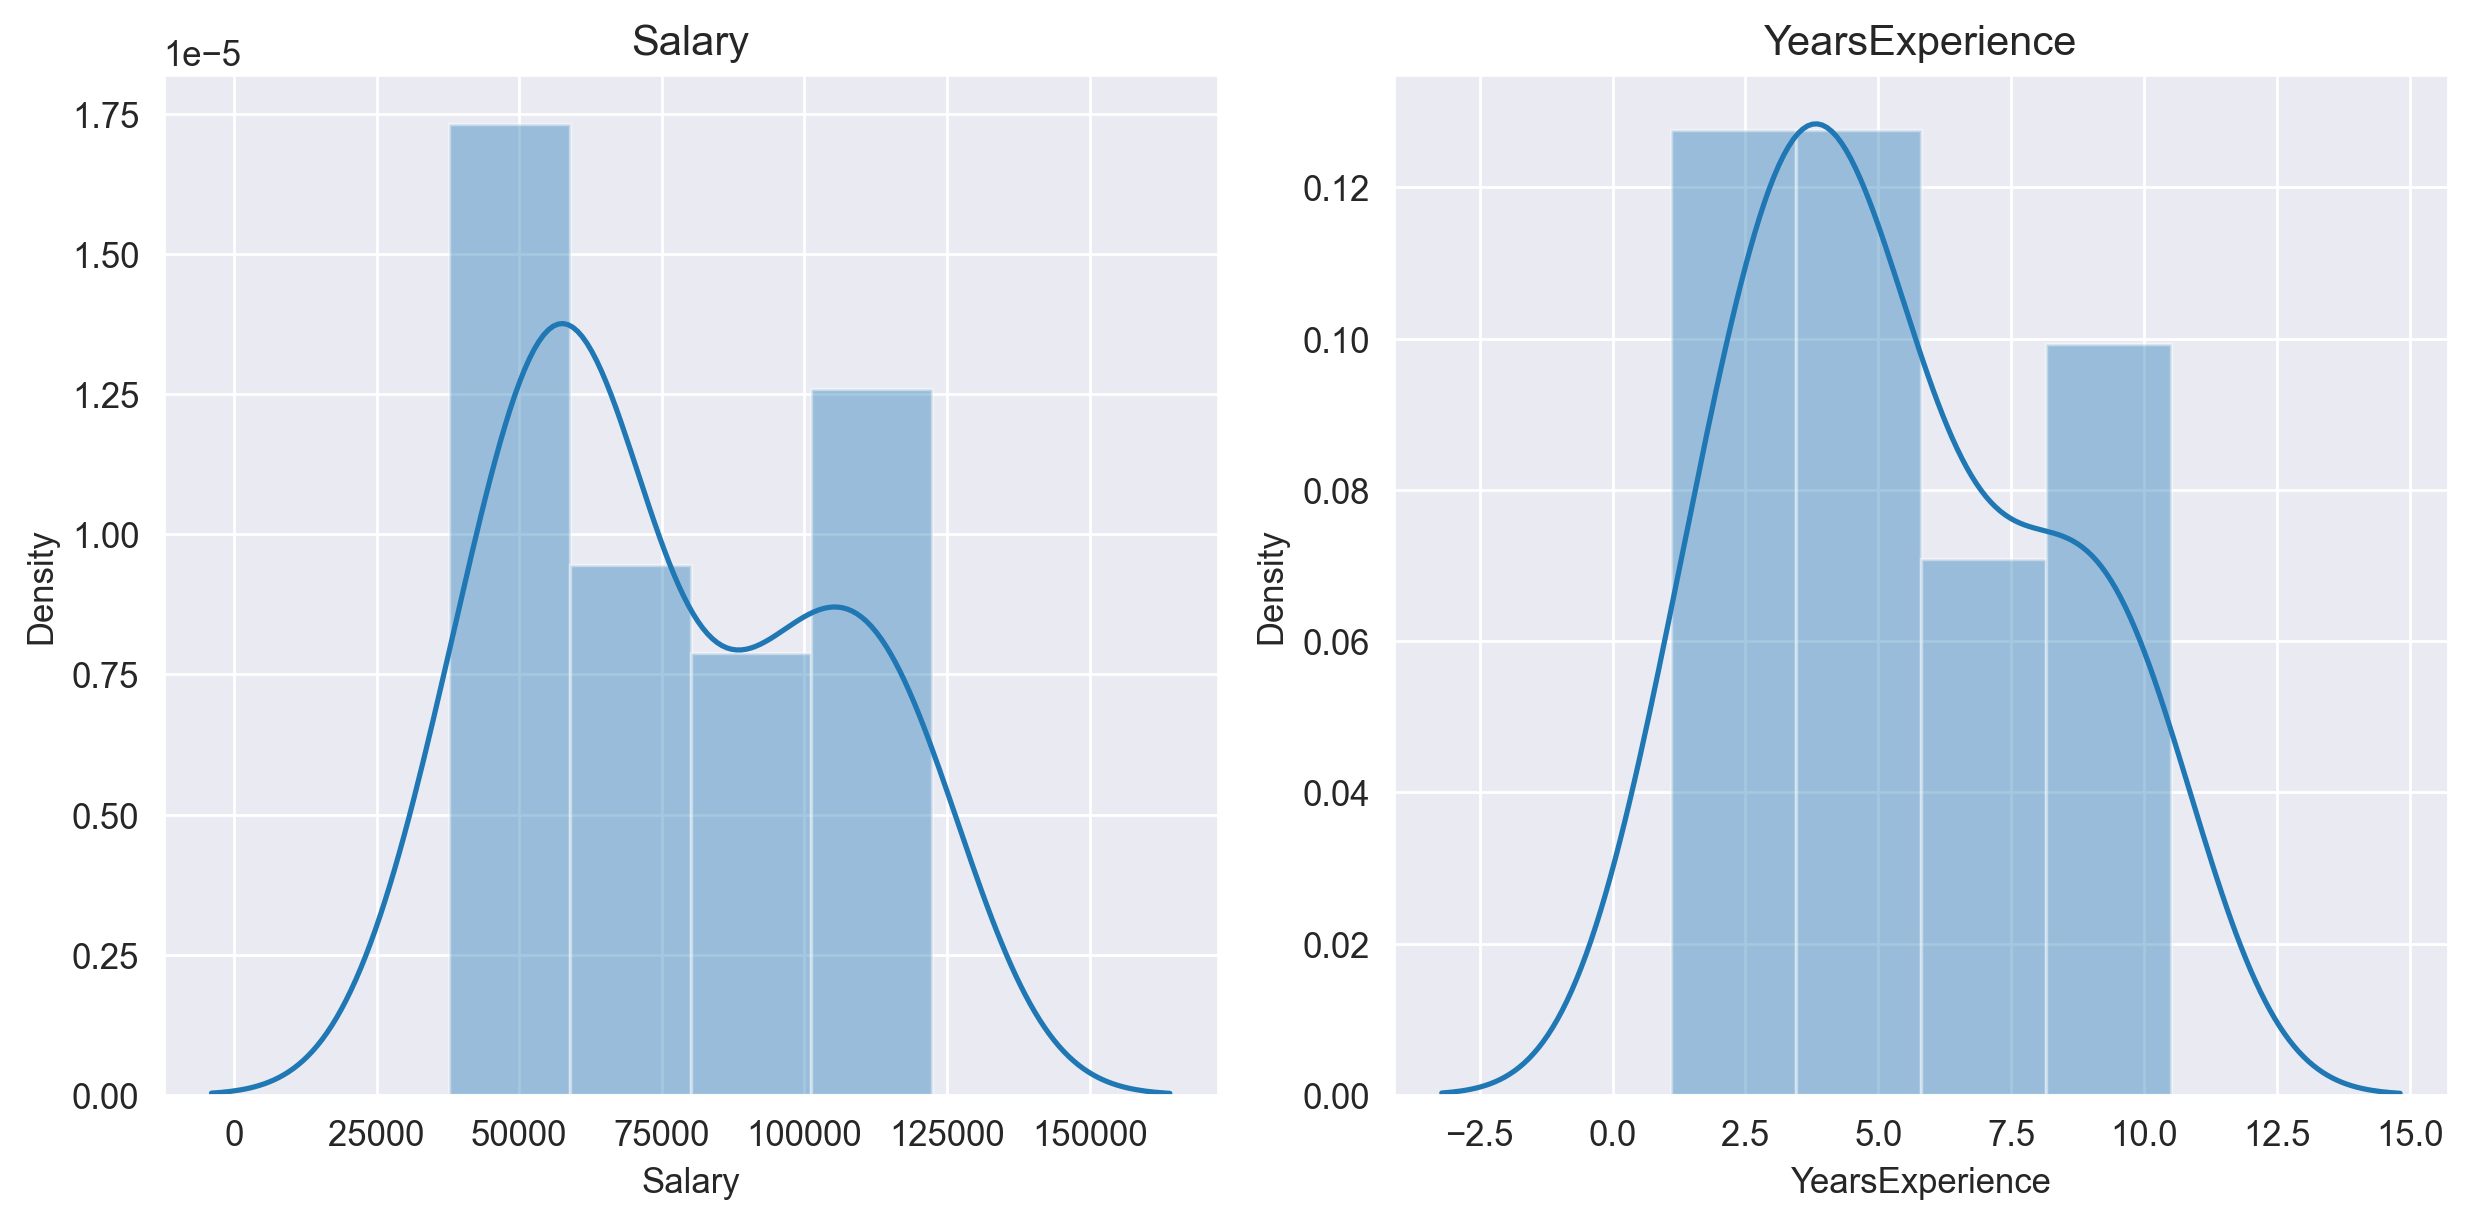

In [19]:
plt.subplot(1,2,1)
sns.distplot(data['Salary'])
plt.title('Salary')

plt.subplot(1,2,2)
sns.distplot(data['YearsExperience'])
plt.title('YearsExperience')

plt.tight_layout()


In [20]:
data['YearsExperience'].skew()

0.37956024064804106

In [21]:
data['Salary'].skew()

0.35411967922959153

# Log Transformation

In [22]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
df['log_ex'] = np.log(df['YearsExperience'])
df['log_salary'] = np.log(df['Salary'])
df.head()

,YearsExperience,Salary,log_ex,log_salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


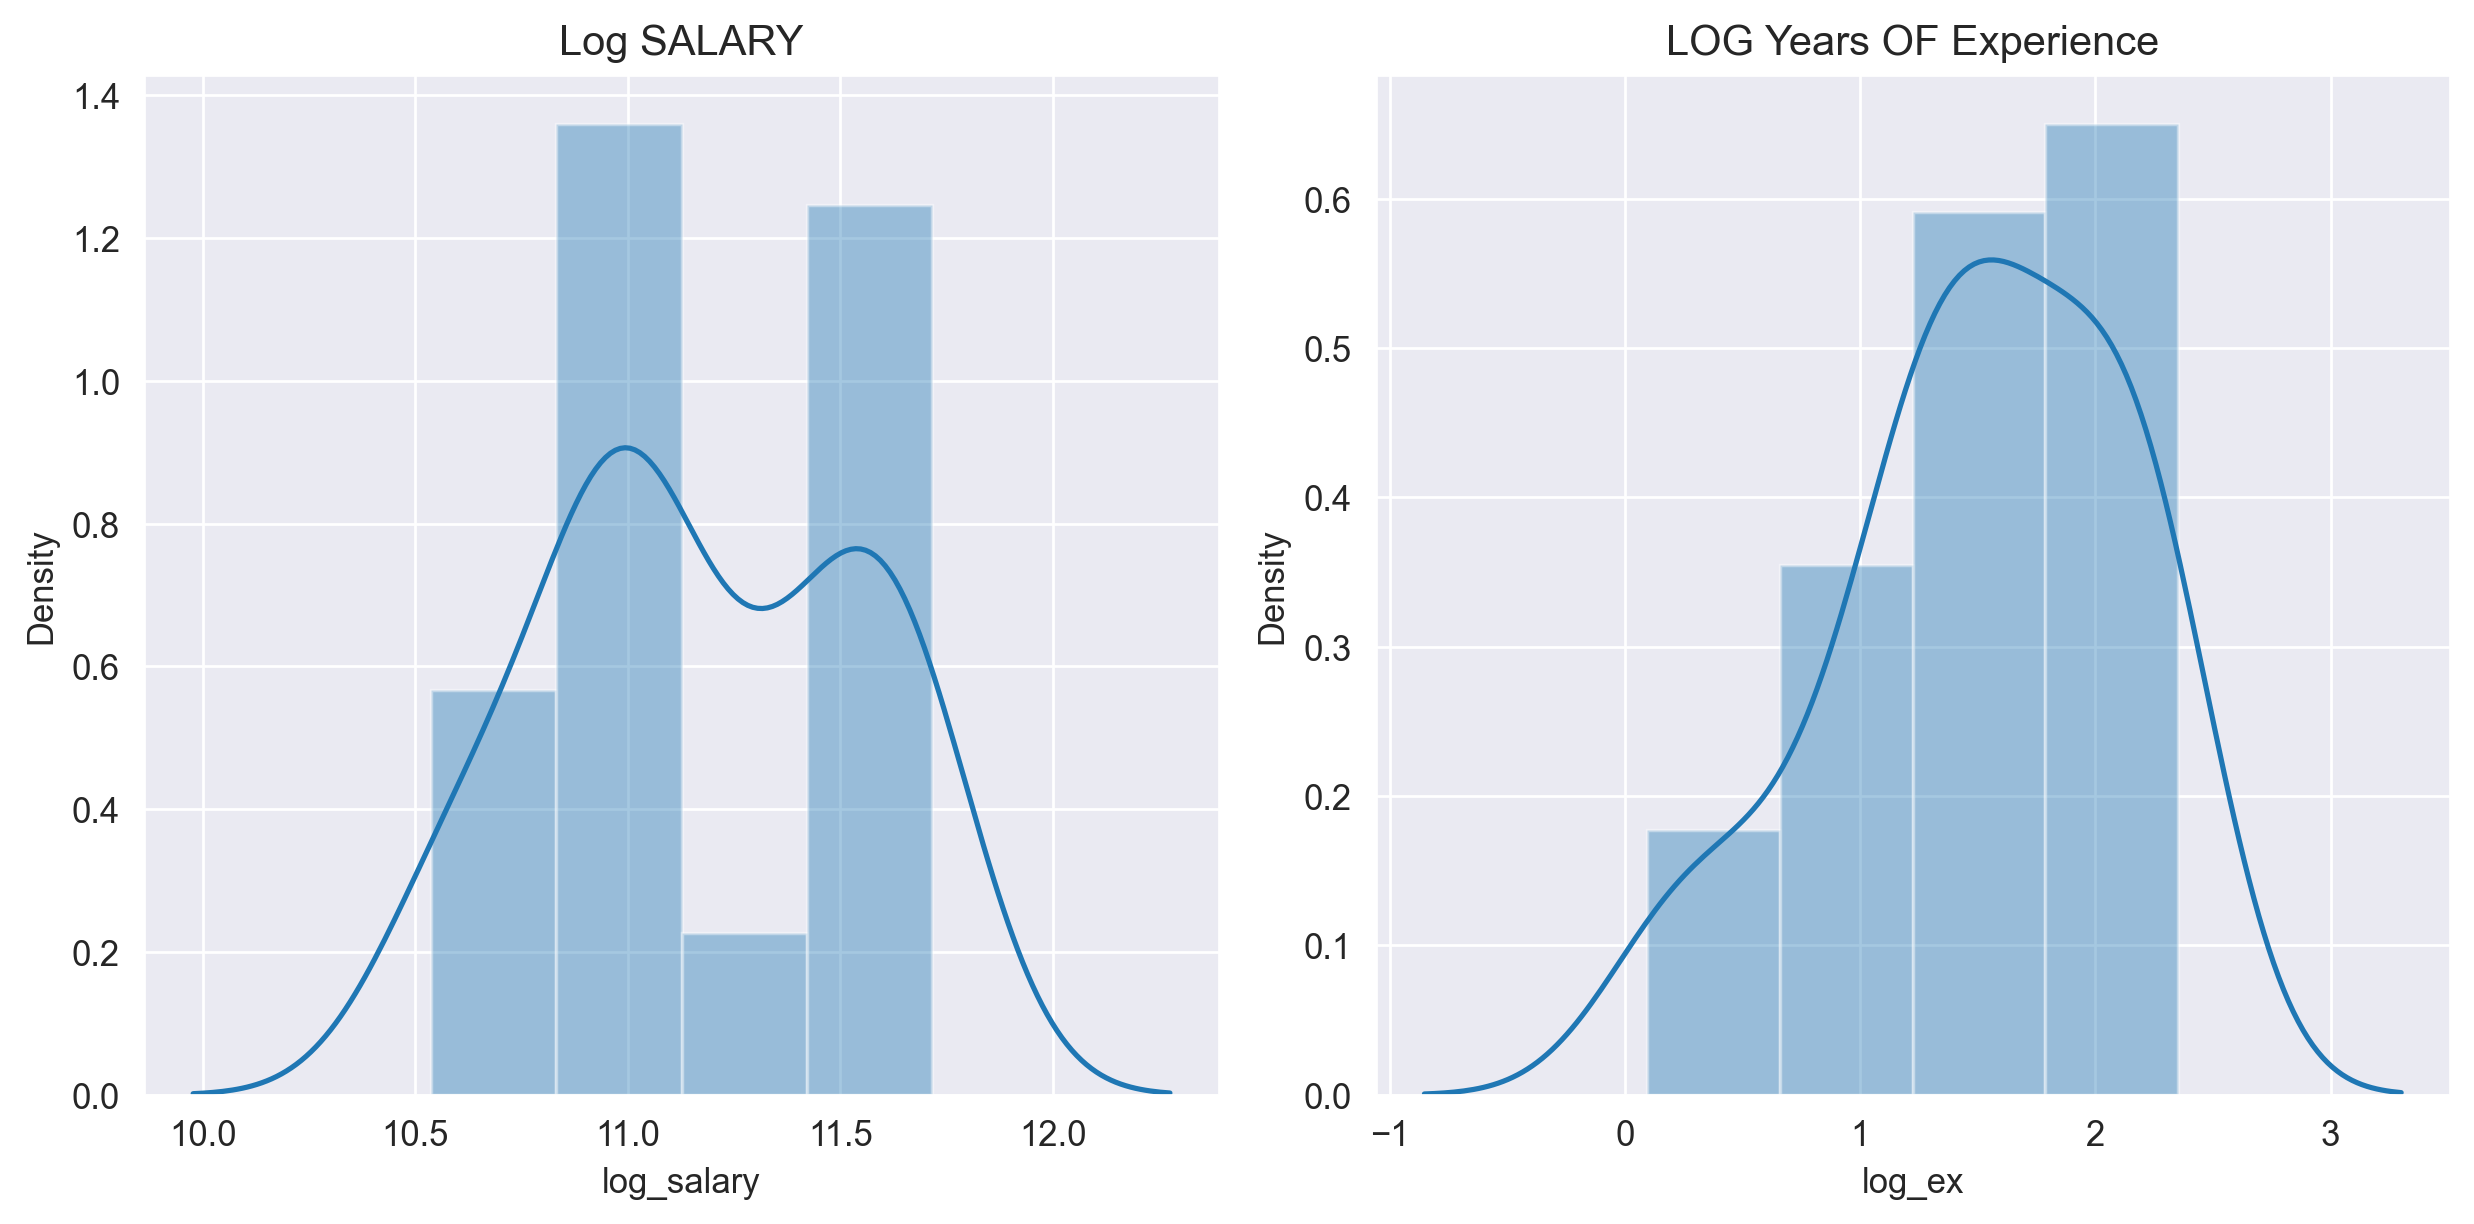

In [24]:
plt.subplot(1,2,1)
sns.distplot(df['log_salary'])
plt.title('Log SALARY')

plt.subplot(1,2,2)
sns.distplot(df['log_ex'])
plt.title('LOG Years OF Experience')

plt.tight_layout()

In [25]:
df['log_ex'].skew()

-0.6005648582626513

In [26]:
df['log_salary'].skew()

-0.044126086756988495

# 2) Delivery_time -> Predict delivery time using sorting time

In [27]:
df = pd.read_csv('delivery_time (1).csv')

In [28]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [29]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [30]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

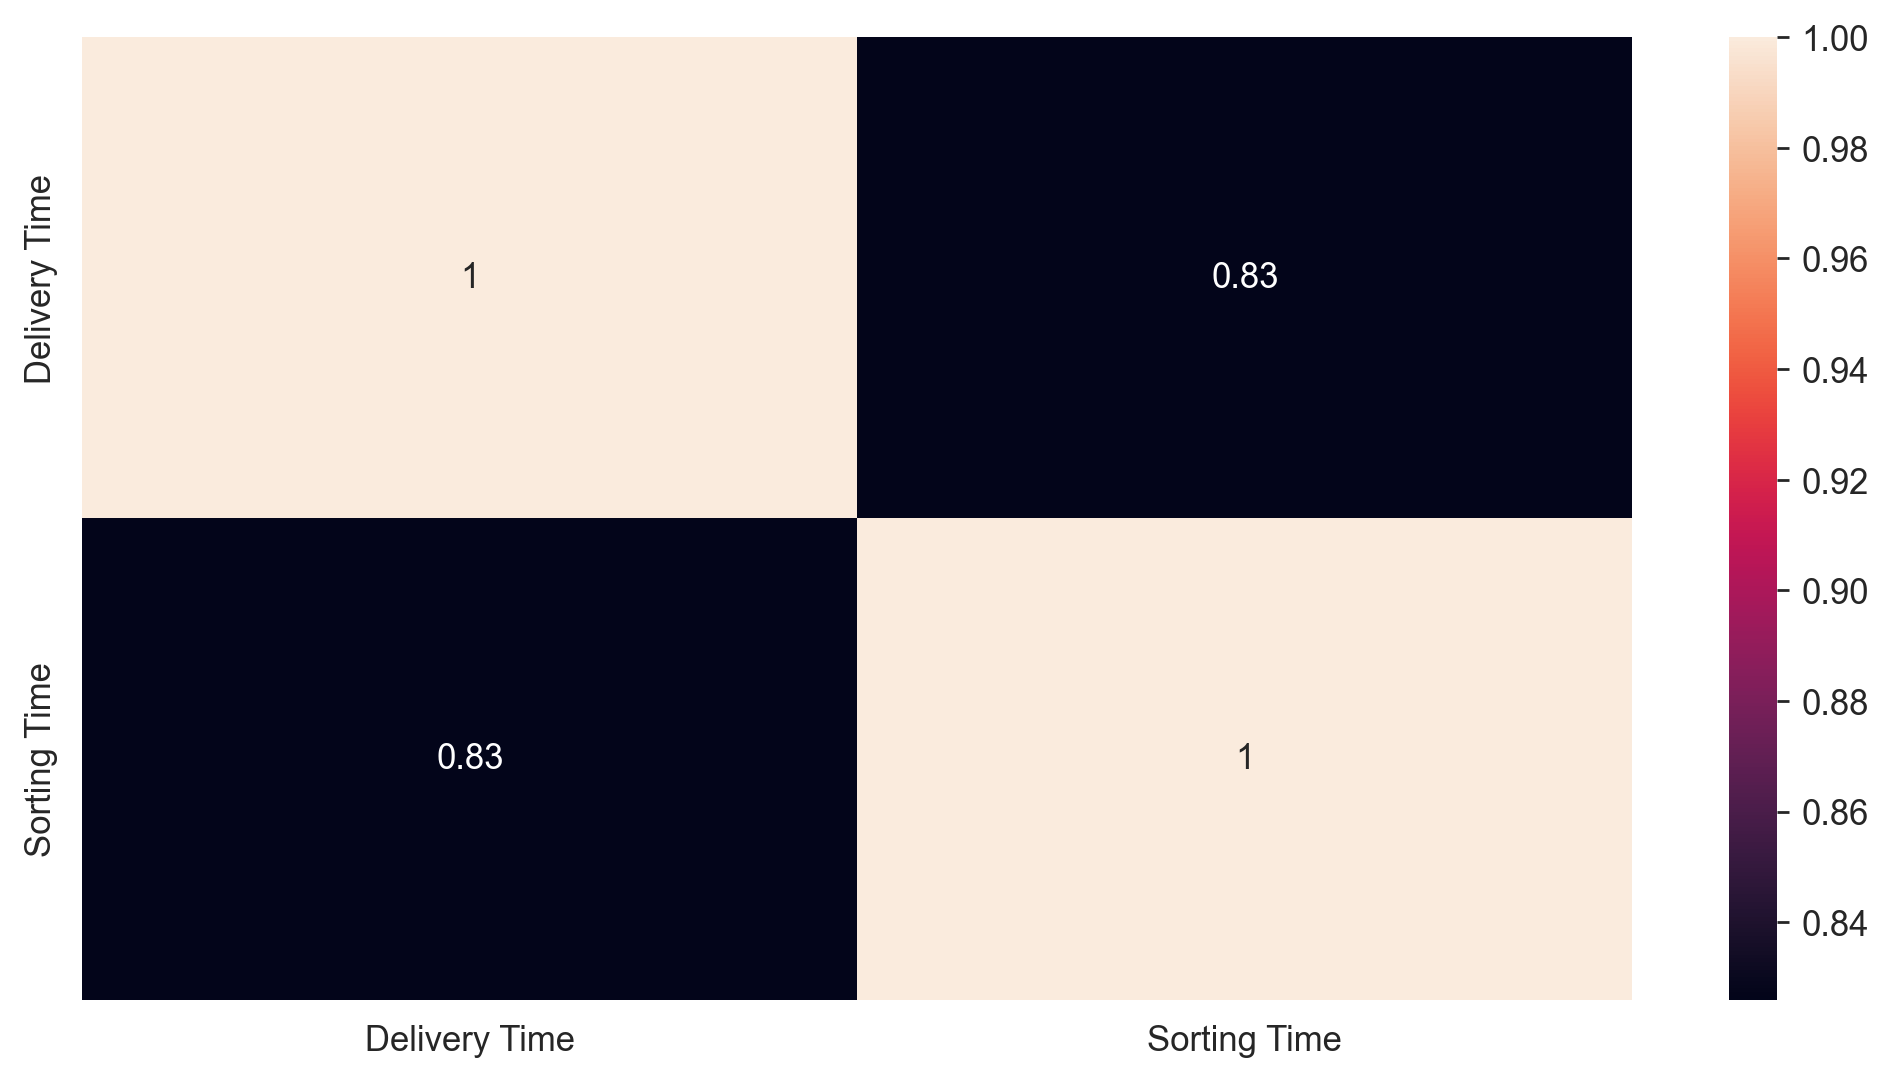

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
dt= df.rename({'Delivery Time' : 'delivery_time', 'Sorting Time': 'sorting_time'},axis =1)
dt


,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Model Testing

In [33]:
model = smf.ols('delivery_time~sorting_time',data=dt).fit()

In [34]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [35]:
sorting_time = 6

y =  1.649020 * sorting_time +  6.582734

y

16.476854

In [36]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [37]:
model.rsquared

0.6822714748417231

# Model Prediction

In [38]:
newdf= pd.DataFrame({
    'sorting_time': [3,8,5,9,7]
})
newdf

,sorting_time
0,3
1,8
2,5
3,9
4,7


In [39]:
model.predict(newdf)

0    11.529794
1    19.774893
2    14.827833
3    21.423913
4    18.125873
dtype: float64

# Data Transformation

# Sqrt

# Log

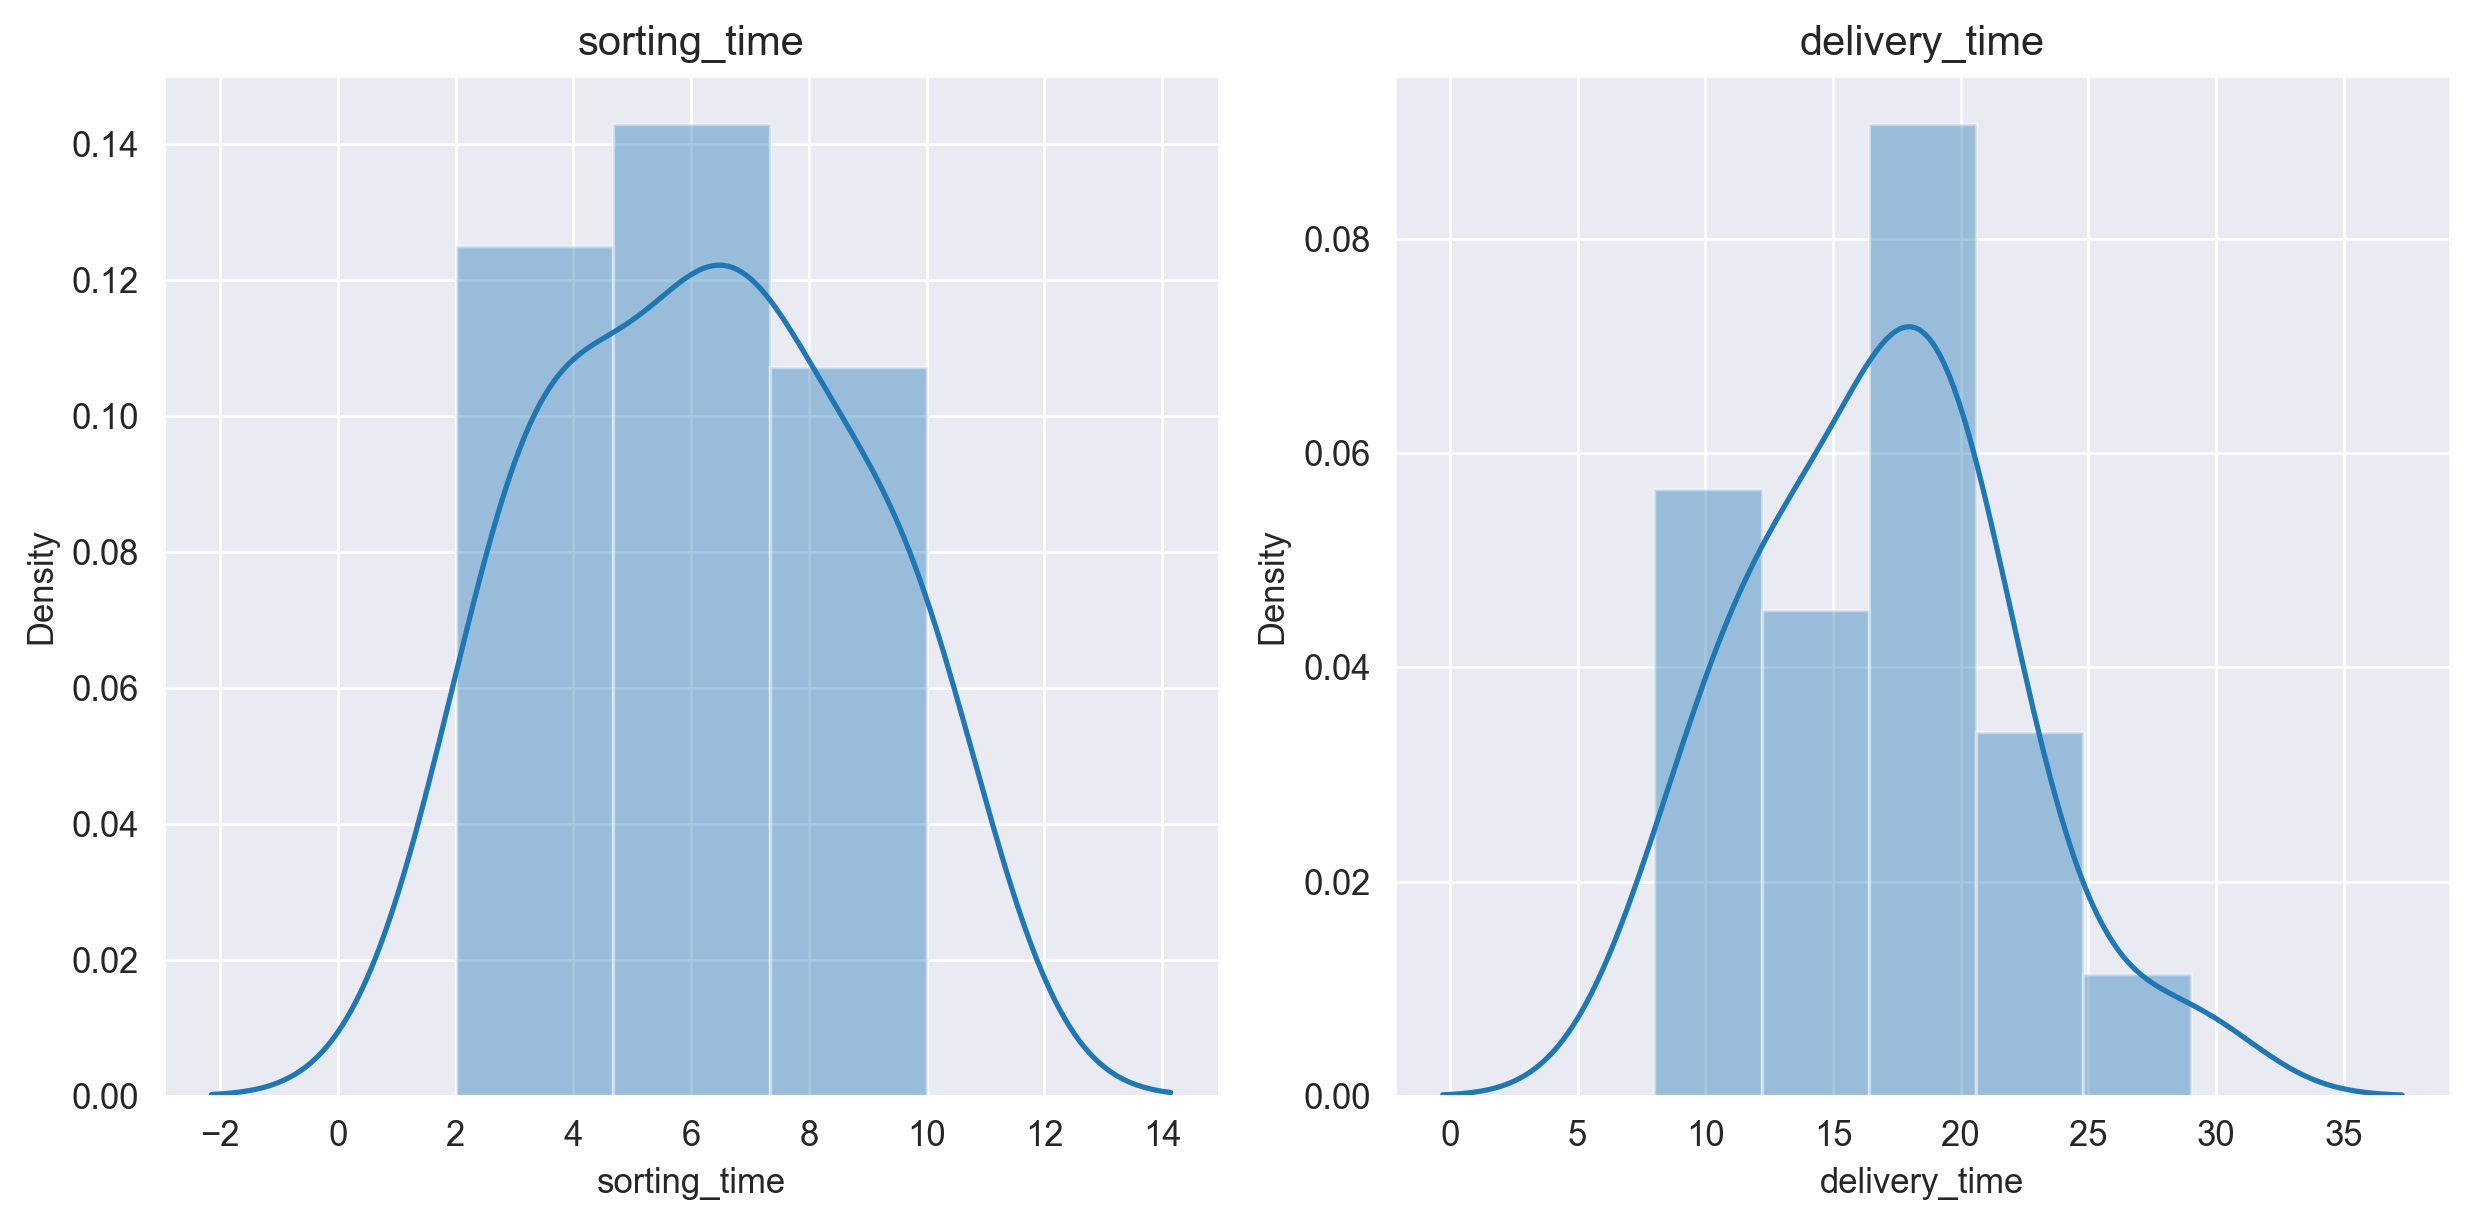

In [40]:
plt.subplot(1,2,1)
sns.distplot(dt['sorting_time'])
plt.title('sorting_time')

plt.subplot(1,2,2)
sns.distplot(dt['delivery_time'])
plt.title('delivery_time')

plt.tight_layout()


In [41]:
dt['delivery_time'].skew()

0.3523900822831107

In [42]:
dt['sorting_time'].skew()

0.047115474210530174

# Log Transformation

In [43]:
dt.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [44]:
dt['log_sorting'] = np.log(dt['sorting_time'])
dt['log_delivery'] = np.log(dt['delivery_time'])
dt

,delivery_time,sorting_time,log_sorting,log_delivery
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296
5,15.35,6,1.791759,2.731115
6,19.00,7,1.945910,2.944439
7,9.50,3,1.098612,2.251292
8,17.90,10,2.302585,2.884801
9,18.75,9,2.197225,2.931194


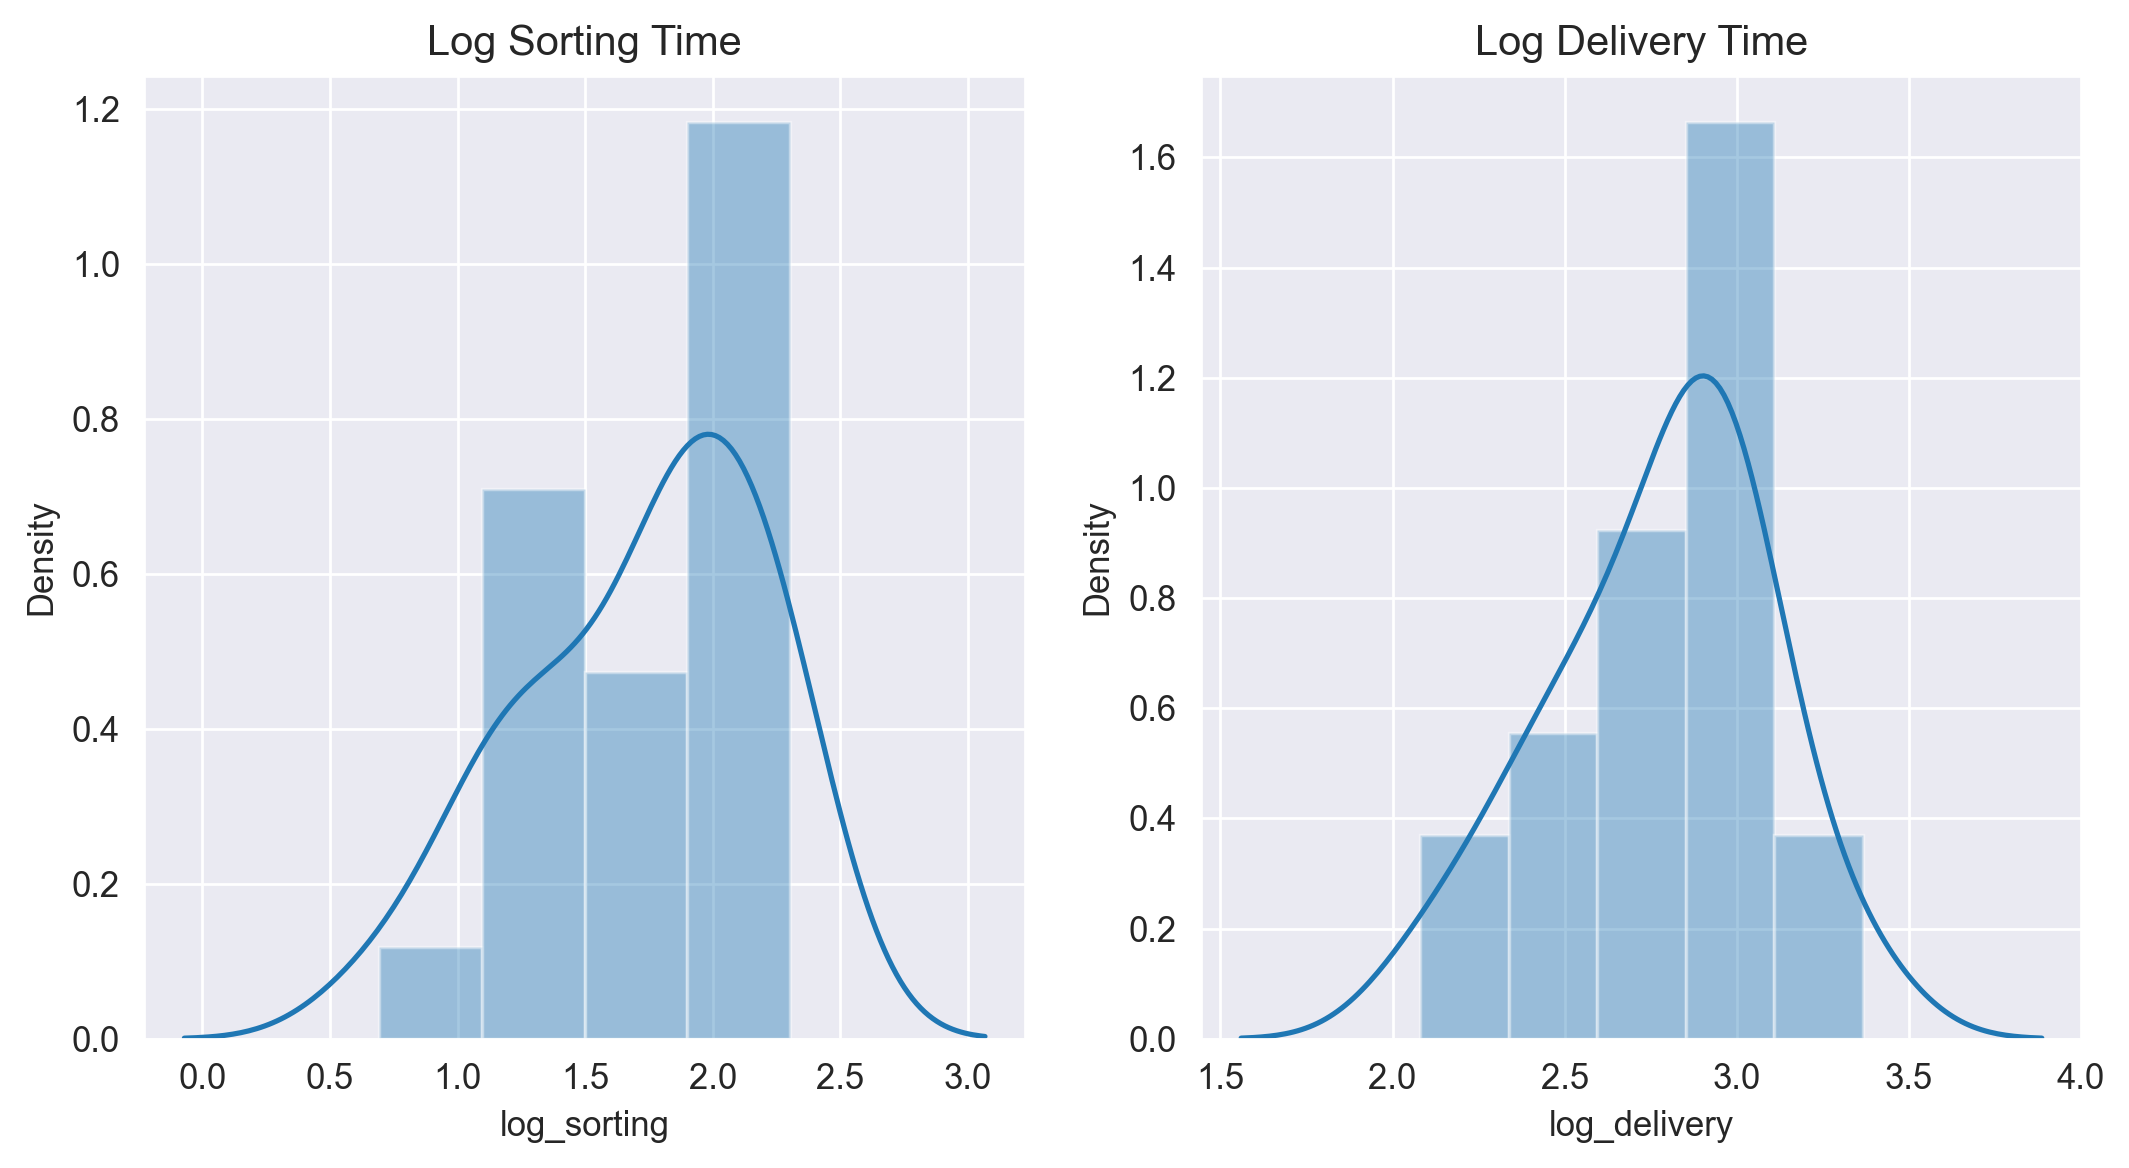

In [45]:
plt.subplot(1,2,1)
sns.distplot(dt['log_sorting'])
plt.title('Log Sorting Time')

plt.subplot(1,2,2)
sns.distplot(dt['log_delivery'])
plt.title('Log Delivery Time')

plt.rcParams['figure.figsize'] = (10,10)
